In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd

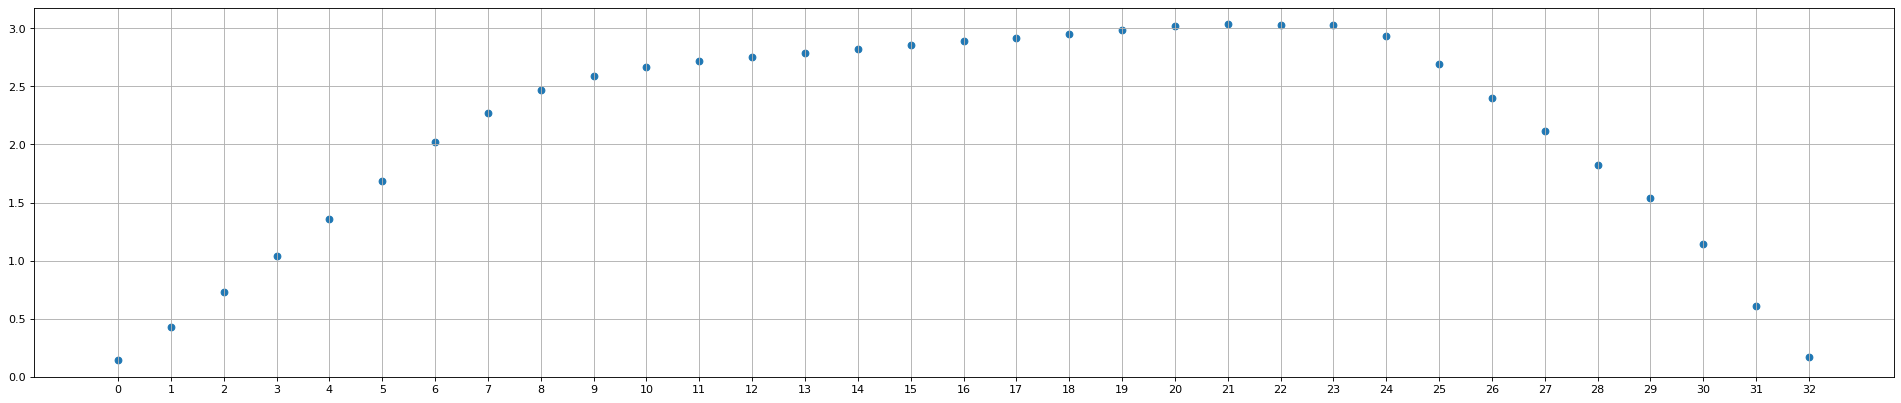

In [200]:
everon_island = pd.read_csv('test_island.csv', names=['ind', 'dist', 'delta'], header=None, delimiter=';')
figure(figsize=(30, 6), dpi=80)
plt.xticks(range(0,  everon_island.dist.size, 1))
plt.scatter(range(0, everon_island.dist.size, 1), everon_island.dist.to_numpy())
plt.grid(axis='both', which='both')

In [188]:
indexes_may_cut = []

In [189]:
def get_distances_to_signchange(signchange):
    signchange_distances = []
    for ind, val in enumerate(signchange):
        not_val = 0 if val == 1 else 1
        try:
            not_val_index = signchange[ind + 1:].index(not_val)
        except ValueError:
            signchange_distances.append(10000000)
            continue
        signchange_distances.append(not_val_index)
    return signchange_distances

In [190]:
asign = np.sign(everon_island.delta.to_numpy())
signchange = ((np.roll(asign, 1) - asign) != 0).astype(int)
distances_to_signchanges = get_distances_to_signchange(signchange.tolist())
distances_from_signchanges = list(reversed(get_distances_to_signchange(signchange.tolist()[::-1])))

min_distances_to_signchanges = [min(i, j) for i, j in zip(distances_to_signchanges, distances_from_signchanges)]

In [191]:
deltas_deltas = [abs(everon_island.delta[i] - everon_island.delta[i-1]) for i in range(1,  everon_island.delta.size)]
deltas_deltas.insert(0, 0.)

In [192]:
dif_from_median= []
del_med = np.median(np.median(everon_island.delta))
for delta in everon_island.delta:
    dif_from_median.append(abs(del_med - delta)) 
    

In [193]:
everon_island['delta_delta']= deltas_deltas

In [194]:
everon_island['dif_from_median']= dif_from_median

In [195]:
everon_island['min_distance_from_signchanges']= min_distances_to_signchanges

In [165]:
#Setting places to cut 
everon_island['should_cut'] = False
for ind in indexes_may_cut:
    everon_island.at[ind, 'should_cut'] = True

In [201]:
everon_island = everon_island.drop(columns = ['ind'], axis =1)

In [199]:
everon_island.to_csv('island_test.csv', index=False)

In [154]:
#Concat islands df

In [186]:
frames = []
for index in range(1, 7, 1):
    frames.append(pd.read_csv(f'island_{index}_res.csv', delimiter=','))
result = pd.concat(frames)

result = result.loc[:, ~result.columns.str.contains('^Unnamed')]
result = result.drop(columns = ['ind'], axis = 1)
result.to_csv('sum_island_df.csv', index=False)
result

,dist,delta,delta_delta,dif_from_median,min_distance_from_signchanges,should_cut
0,0.821307,0.211402,0.000000e+00,0.181989,13,False
1,1.097101,0.275794,6.439259e-02,0.246381,12,False
2,1.386558,0.289456,1.366181e-02,0.260043,11,False
3,1.676014,0.289456,1.000000e-09,0.260043,10,False
4,1.944390,0.268376,2.108001e-02,0.238963,9,False
...,...,...,...,...,...,...
17,1.751540,0.047543,2.958920e-02,0.000869,0,True
18,2.635020,0.294496,2.469531e-01,0.246084,1,False
19,4.090320,0.485099,1.906030e-01,0.436687,2,False
20,7.193710,1.034460,5.493610e-01,0.986048,3,False
